In [55]:
import pandas as pd
import matplotlib.pyplot as plt


In [56]:
df = pd.read_csv('Student_Mental_health.csv')

In [57]:
print(df.head(10))
df.info()
# 101 entries - large enough dataset?

        Timestamp Choose your gender   Age What is your course?  \
0  8/7/2020 12:02             Female  18.0          Engineering   
1  8/7/2020 12:04               Male  21.0    Islamic education   
2  8/7/2020 12:05               Male  19.0                  BIT   
3  8/7/2020 12:06             Female  22.0                 Laws   
4  8/7/2020 12:13               Male  23.0         Mathemathics   
5  8/7/2020 12:31               Male  19.0          Engineering   
6  8/7/2020 12:32             Female  23.0     Pendidikan islam   
7  8/7/2020 12:33             Female  18.0                  BCS   
8  8/7/2020 12:35             Female  19.0      Human Resources   
9  8/7/2020 12:39               Male  18.0                Irkhs   

  Your current year of Study What is your CGPA? Marital status  \
0                     year 1        3.00 - 3.49             No   
1                     year 2        3.00 - 3.49             No   
2                     Year 1        3.00 - 3.49             No  

In [58]:
# return all the unique course in dataset
print(df['What is your course?'].unique())

['Engineering' 'Islamic education' 'BIT' 'Laws' 'Mathemathics'
 'Pendidikan islam' 'BCS' 'Human Resources' 'Irkhs' 'Psychology' 'KENMS'
 'Accounting ' 'ENM' 'Marine science' 'KOE' 'Banking Studies'
 'Business Administration' 'Law' 'KIRKHS' 'Usuluddin ' 'TAASL' 'Engine'
 'ALA' 'Biomedical science' 'koe' 'Kirkhs' 'BENL' 'Benl' 'IT' 'CTS'
 'engin' 'Econs' 'MHSC' 'Malcom' 'Kop' 'Human Sciences ' 'Biotechnology'
 'Communication ' 'Diploma Nursing' 'Pendidikan Islam ' 'Radiography'
 'psychology' 'Fiqh fatwa ' 'DIPLOMA TESL' 'Koe' 'Fiqh'
 'Islamic Education' 'Nursing ' 'Pendidikan Islam']


In [59]:
# how many samples (records) for each course?
print(df['What is your course?'].value_counts())

# some entries same course but different lettering - islamic education/Education
# some entries maybe entered wrong by student - student entered name instead of course - Malcom (this must be a name), Usuluddin
# how should i clean these wrong entries? use fuzzy matching

# 'pendidkan' is the indonesian word for education (these records are same as islamic studies courses), 'fiqh' and 'fiqh fatwa'
# also refer to this course?
# 'diploma nursing' and 'nursing' same?
# 'engin' is engineering?
# 'laws' and 'law'
# 'kow' and 'Kow' (capital difference, read as different entry by python)

# same courses are entered slightly different - this is a key theme in this data
# spelling mistakes?

# what course does BCS refer to? - check metadata - google search of international islamic university of malaysia reveals it is 
# bachelor of computer science
# what course does BIT refer to? google search reveals bachelor of information technology


What is your course?
BCS                        18
Engineering                17
BIT                        10
Biomedical science          4
KOE                         4
BENL                        2
Laws                        2
psychology                  2
Engine                      2
Islamic Education           1
Biotechnology               1
engin                       1
Econs                       1
MHSC                        1
Malcom                      1
Kop                         1
Human Sciences              1
Communication               1
Nursing                     1
Diploma Nursing             1
IT                          1
Pendidikan Islam            1
Radiography                 1
Fiqh fatwa                  1
DIPLOMA TESL                1
Koe                         1
Fiqh                        1
CTS                         1
koe                         1
Benl                        1
Kirkhs                      1
Mathemathics                1
Pendidikan islam   

In [60]:
# how many records in dataset (sample size?)
print(len(df))

101


In [61]:
df.info() # age should not be a float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [62]:
# check for rows that have missing values
null_data = df[df.isnull().any(axis=1)]
null_data

#gpa mistake? too low to get into university

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
43,8/7/2020 15:07,Male,NaN,BIT,year 1,0 - 1.99,No,No,No,No,No


In [63]:
# plot individual variables to further explore data
anxiety = df['Do you have Anxiety?'].value_counts()
anxiety

Do you have Anxiety?
No     67
Yes    34
Name: count, dtype: int64

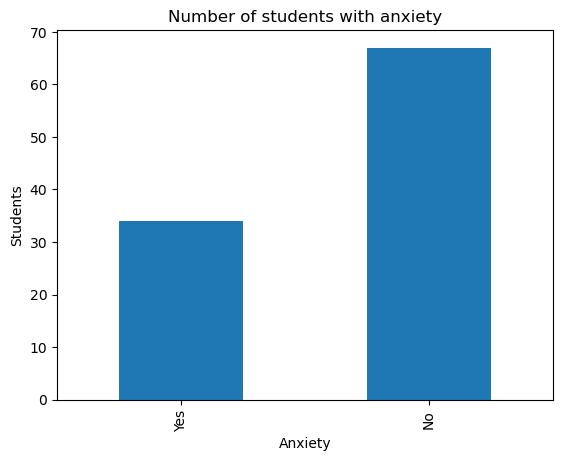

In [64]:
anxiety.plot(kind='bar')
plt.gca().invert_xaxis()
plt.xlabel('Anxiety')
plt.ylabel('Students')
plt.title("Number of students with anxiety")
plt.savefig("anxiety in students")

In [65]:
# convert all courses to lower case
df['What is your course?'] = df['What is your course?'].str.lower()
print(df)

               Timestamp Choose your gender   Age What is your course?  \
0         8/7/2020 12:02             Female  18.0          engineering   
1         8/7/2020 12:04               Male  21.0    islamic education   
2         8/7/2020 12:05               Male  19.0                  bit   
3         8/7/2020 12:06             Female  22.0                 laws   
4         8/7/2020 12:13               Male  23.0         mathemathics   
..                   ...                ...   ...                  ...   
96   13/07/2020 19:56:49             Female  21.0                  bcs   
97   13/07/2020 21:21:42               Male  18.0          engineering   
98   13/07/2020 21:22:56             Female  19.0             nursing    
99   13/07/2020 21:23:57             Female  23.0     pendidikan islam   
100  18/07/2020 20:16:21               Male  20.0   biomedical science   

    Your current year of Study What is your CGPA? Marital status  \
0                       year 1        3.00 

In [66]:
# number of unique courses lowered to 42
df['What is your course?'].nunique()

42

In [67]:
# check other health variables if show similar trend
depression = df['Do you have Depression?'].value_counts()
depression

Do you have Depression?
No     66
Yes    35
Name: count, dtype: int64

In [68]:
panic = df['Do you have Panic attack?'].value_counts()
panic

Do you have Panic attack?
No     68
Yes    33
Name: count, dtype: int64

In [69]:
print(df['What is your course?'].unique())

['engineering' 'islamic education' 'bit' 'laws' 'mathemathics'
 'pendidikan islam' 'bcs' 'human resources' 'irkhs' 'psychology' 'kenms'
 'accounting ' 'enm' 'marine science' 'koe' 'banking studies'
 'business administration' 'law' 'kirkhs' 'usuluddin ' 'taasl' 'engine'
 'ala' 'biomedical science' 'benl' 'it' 'cts' 'engin' 'econs' 'mhsc'
 'malcom' 'kop' 'human sciences ' 'biotechnology' 'communication '
 'diploma nursing' 'pendidikan islam ' 'radiography' 'fiqh fatwa '
 'diploma tesl' 'fiqh' 'nursing ']


In [70]:
# data seems to be consistent
# next try to split data into two categories - technical vs non technincal subjects - how to go about this? 
# need to use all subjects?
# need to add more subjects to these lists, not large enough sample size
technical_list = ['bcs','engineering','bit','mathemathics','biomedical science','biotechnology','engin']
non_technical_list = ['islamic education', 'pendidikan islam', 'pendidikan islam ', 'fiqh fatwa ', 'fiqh', 'human resources',
                      'irkhs', 'business', 'communication ', 'psychology']


In [71]:
tech_sub = df[df['What is your course?'].isin(technical_list)]
tech_sub
tech_sub.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     52 non-null     object 
 1   Choose your gender                            52 non-null     object 
 2   Age                                           51 non-null     float64
 3   What is your course?                          52 non-null     object 
 4   Your current year of Study                    52 non-null     object 
 5   What is your CGPA?                            52 non-null     object 
 6   Marital status                                52 non-null     object 
 7   Do you have Depression?                       52 non-null     object 
 8   Do you have Anxiety?                          52 non-null     object 
 9   Do you have Panic attack?                     52 non-null     object 
 

In [72]:
non_tech_sub = df[df['What is your course?'].isin(non_technical_list)]
non_tech_sub
non_tech_sub.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 1 to 99
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     13 non-null     object 
 1   Choose your gender                            13 non-null     object 
 2   Age                                           13 non-null     float64
 3   What is your course?                          13 non-null     object 
 4   Your current year of Study                    13 non-null     object 
 5   What is your CGPA?                            13 non-null     object 
 6   Marital status                                13 non-null     object 
 7   Do you have Depression?                       13 non-null     object 
 8   Do you have Anxiety?                          13 non-null     object 
 9   Do you have Panic attack?                     13 non-null     object 
 1

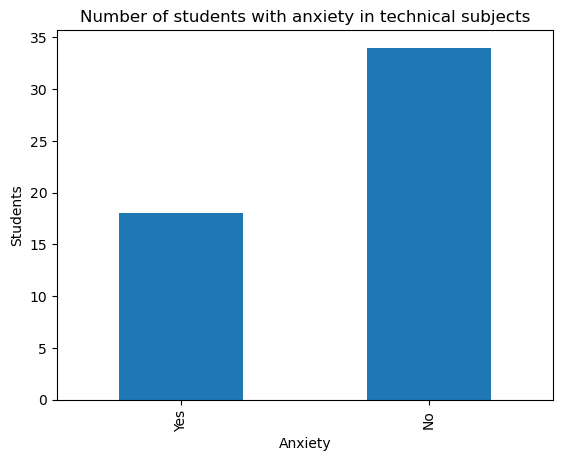

In [78]:
anxiety_tech = tech_sub['Do you have Anxiety?'].value_counts()
anxiety_tech
anxiety_tech.plot(kind='bar')
plt.gca().invert_xaxis()
plt.xlabel('Anxiety')
plt.ylabel('Students')
plt.title("Number of students with anxiety in technical subjects")
plt.savefig("anxiety in tech students")

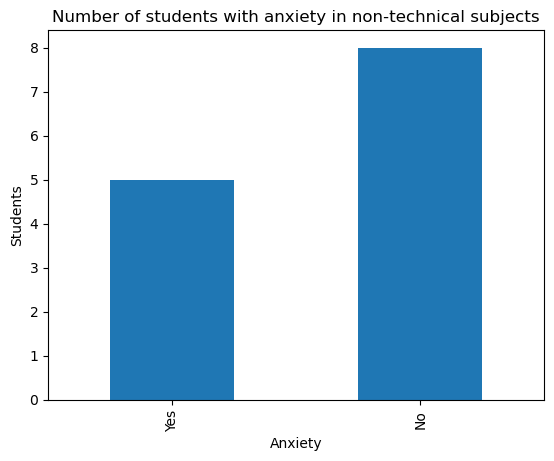

In [80]:
anxiety_non_tech = non_tech_sub['Do you have Anxiety?'].value_counts()
anxiety_non_tech.plot(kind='bar')
plt.gca().invert_xaxis()
plt.xlabel('Anxiety')
plt.ylabel('Students')
plt.title("Number of students with anxiety in non-technical subjects")
plt.savefig("anxiety in non tech students")